In [1]:
!pip install protobuf==3.20.3

# test

In [3]:
import sys
sys.path.append("/home/kevin/Documents/TESI/AMEGO/submodules/epic-kitchens-100-hand-object-bboxes/src")
import numpy as np
from raw_detections.io import load_detections
from dataclasses import asdict
import json

In [24]:
enigma_detections = load_detections(
    # "44.pkl"
    "P_01.pkl"
)


In [40]:
len(enigma_detections)

99135

In [41]:
from pprint import pprint
y = enigma_detections[200]

pprint(y)

FrameDetections(video_id='P01_01', frame_number=201, objects=[], hands=[])


tutti i bounding box (obj, hand) hanno larghezza 0

In [39]:
x = [
    p for p in enigma_detections
    if any(obj.bbox.width != 0 or obj.bbox.height != 0 for obj in p.objects)
    or any(hand.bbox.width != 0 or hand.bbox.height != 0 for hand in p.hands)
]
pprint(x)

[]


In [42]:
x = [p for p in enigma_detections if len(p.hands) > 0][600]
pprint(x)

FrameDetections(video_id='P01_01',
                frame_number=1249,
                objects=[ObjectDetection(bbox=BBox(top_left=IntCoordinate(x=0,
                                                                          y=0),
                                                   width=0,
                                                   height=0),
                                         score=0.9961406588554382),
                         ObjectDetection(bbox=BBox(top_left=IntCoordinate(x=0,
                                                                          y=0),
                                                   width=0,
                                                   height=0),
                                         score=0.3809986710548401)],
                hands=[HandDetection(bbox=BBox(top_left=IntCoordinate(x=0, y=0),
                                               width=0,
                                               height=0),
                                    

## ls amego

In [43]:
with open("./lsamego/P01_01.json", "r", encoding="utf-8") as f:
    lsamego = json.load(f)

In [56]:
len(lsamego)

454

In [54]:
lsamego[0].keys()

dict_keys(['cluster', 'features', 'num_frame'])

In [69]:
len(lsamego[0]['num_frame']), lsamego[0]['num_frame']

(70,
 [278,
  279,
  280,
  281,
  282,
  283,
  284,
  285,
  286,
  287,
  288,
  289,
  290,
  291,
  292,
  293,
  294,
  295,
  296,
  297,
  298,
  299,
  300,
  301,
  302,
  303,
  304,
  305,
  306,
  307,
  308,
  309,
  310,
  311,
  312,
  313,
  314,
  315,
  316,
  317,
  318,
  319,
  320,
  321,
  322,
  323,
  324,
  325,
  326,
  327,
  328,
  329,
  330,
  331,
  332,
  333,
  334,
  335,
  336,
  337,
  338,
  339,
  340,
  341,
  342,
  343,
  344,
  345,
  346,
  347])

In [68]:
len(lsamego[0]['features'][0][0]), lsamego[0]['features'][0][0]

(1024,
 [-0.374815434217453,
  0.9524235129356384,
  0.9027485847473145,
  -0.8891274929046631,
  -1.134972095489502,
  -0.686718225479126,
  -1.2340210676193237,
  0.049951888620853424,
  2.570300340652466,
  0.18840770423412323,
  -1.1813348531723022,
  3.159862518310547,
  -1.756729006767273,
  1.136359453201294,
  -0.05104634538292885,
  0.3807492256164551,
  1.5904396772384644,
  0.14394047856330872,
  -1.0945628881454468,
  -0.8612640500068665,
  1.8647679090499878,
  -0.1597500741481781,
  -0.5667130351066589,
  0.2228035181760788,
  0.04075218737125397,
  0.4829595386981964,
  -2.203117847442627,
  -0.2899089455604553,
  -0.19555744528770447,
  0.6609099507331848,
  0.20520780980587006,
  0.510723352432251,
  0.32920506596565247,
  0.8002587556838989,
  -0.3681400716304779,
  1.5082347393035889,
  -1.1441298723220825,
  2.328089952468872,
  -1.3555704355239868,
  0.4718078076839447,
  -1.5777595043182373,
  1.11801016330719,
  -2.012725353240967,
  1.001043677330017,
  0.492945

## enig

In [4]:
with open("ENIGMA-51_annotations_master.json", "r", encoding="utf-8") as f:
    enigma_annotations = json.load(f)

In [5]:
filtered = {
    k: v
    for k, v in enigma_annotations['frame_annotations'].items()
    if k.startswith("44_")
}

In [6]:
x = np.array([{"key": k, "value": v} for k, v in filtered.items()], dtype=object)

In [7]:
# Filtra elementi con chiave che inizia con "44_" e almeno 2 interazioni
filtered_at_least_2 = {
    k: v
    for k, v in enigma_annotations['frame_annotations'].items()
    if k.startswith("44_") and len(v.get("interactions", [])) >= 2
}

# Trasforma in array di oggetti {"key": k, "value": v}
result_array = np.array([{"key": k, "value": v} for k, v in filtered_at_least_2.items()], dtype=object)

print(result_array)


[{'key': '44_3096', 'value': {'video_id': 44, 'filename': '44_3096.jpg', 'timestamp': 103.2, 'labels_status': {'hands_status': True, 'objects_status': True, 'interaction_status': True, 'past_frames_status': False}, 'hands': [{'x': 1823, 'y': 930, 'w': 444, 'h': 343, 'hand_side': 'right', 'id': 27}, {'x': 232, 'y': 634, 'w': 521, 'h': 518, 'hand_side': 'left', 'id': 28}], 'objects': [{'id': 172, 'x': 608.107, 'y': 764.198, 'w': 900.778, 'h': 234.138, 'class_id': 13}, {'id': 173, 'x': 328.443, 'y': 686.153, 'w': 1521.893, 'h': 588.595, 'class_id': 13}, {'id': 175, 'x': 61, 'y': 313, 'w': 39, 'h': 85, 'class_id': 4}, {'id': 176, 'x': 0, 'y': 380, 'w': 140, 'h': 91, 'class_id': 3}, {'id': 177, 'x': 1249, 'y': 252, 'w': 255, 'h': 504, 'class_id': 11}, {'id': 178, 'x': 1534, 'y': 304, 'w': 219, 'h': 340, 'class_id': 12}, {'id': 179, 'x': 3, 'y': 0, 'w': 687, 'h': 122, 'class_id': 2}, {'id': 180, 'x': 1823, 'y': -3, 'w': 444, 'h': 434, 'class_id': 5}, {'id': 181, 'x': 1489, 'y': 550, 'w': 705

In [23]:
len(result_array)

14

In [36]:
result_array[0]['value']['filename']

'44_3096.jpg'

In [27]:
result_array[0]['value']['interactions']

[{'id': 41, 'id_hand': -1, 'id_obj': 172, 'interaction_category': 3},
 {'id': 42, 'id_hand': -1, 'id_obj': 173, 'interaction_category': 3}]

In [32]:
result_array[0]['value']['objects']

[{'id': 172,
  'x': 608.107,
  'y': 764.198,
  'w': 900.778,
  'h': 234.138,
  'class_id': 13},
 {'id': 173,
  'x': 328.443,
  'y': 686.153,
  'w': 1521.893,
  'h': 588.595,
  'class_id': 13},
 {'id': 175, 'x': 61, 'y': 313, 'w': 39, 'h': 85, 'class_id': 4},
 {'id': 176, 'x': 0, 'y': 380, 'w': 140, 'h': 91, 'class_id': 3},
 {'id': 177, 'x': 1249, 'y': 252, 'w': 255, 'h': 504, 'class_id': 11},
 {'id': 178, 'x': 1534, 'y': 304, 'w': 219, 'h': 340, 'class_id': 12},
 {'id': 179, 'x': 3, 'y': 0, 'w': 687, 'h': 122, 'class_id': 2},
 {'id': 180, 'x': 1823, 'y': -3, 'w': 444, 'h': 434, 'class_id': 5},
 {'id': 181, 'x': 1489, 'y': 550, 'w': 705, 'h': 720, 'class_id': 8},
 {'id': 182, 'x': 1062, 'y': 5, 'w': 538, 'h': 201, 'class_id': 12}]

In [34]:
enigma_annotations['object_classes']['13']

{'class_name': 'high_voltage_board'}

In [37]:
result_array[0]

{'key': '44_3096',
 'value': {'video_id': 44,
  'filename': '44_3096.jpg',
  'timestamp': 103.2,
  'labels_status': {'hands_status': True,
   'objects_status': True,
   'interaction_status': True,
   'past_frames_status': False},
  'hands': [{'x': 1823,
    'y': 930,
    'w': 444,
    'h': 343,
    'hand_side': 'right',
    'id': 27},
   {'x': 232, 'y': 634, 'w': 521, 'h': 518, 'hand_side': 'left', 'id': 28}],
  'objects': [{'id': 172,
    'x': 608.107,
    'y': 764.198,
    'w': 900.778,
    'h': 234.138,
    'class_id': 13},
   {'id': 173,
    'x': 328.443,
    'y': 686.153,
    'w': 1521.893,
    'h': 588.595,
    'class_id': 13},
   {'id': 175, 'x': 61, 'y': 313, 'w': 39, 'h': 85, 'class_id': 4},
   {'id': 176, 'x': 0, 'y': 380, 'w': 140, 'h': 91, 'class_id': 3},
   {'id': 177, 'x': 1249, 'y': 252, 'w': 255, 'h': 504, 'class_id': 11},
   {'id': 178, 'x': 1534, 'y': 304, 'w': 219, 'h': 340, 'class_id': 12},
   {'id': 179, 'x': 3, 'y': 0, 'w': 687, 'h': 122, 'class_id': 2},
   {'id':

In [10]:
filtered

{'44_898': {'video_id': 44,
  'filename': '44_898.jpg',
  'timestamp': 29.933,
  'labels_status': {'hands_status': True,
   'objects_status': True,
   'interaction_status': True,
   'past_frames_status': False},
  'hands': [{'x': 1012,
    'y': 747,
    'w': 301,
    'h': 468,
    'hand_side': 'right',
    'id': 0}],
  'objects': [{'id': 0,
    'x': 1043.863,
    'y': 715.42,
    'w': 87.801,
    'h': 84.549,
    'class_id': 18},
   {'id': 2, 'x': 925, 'y': 732, 'w': 96, 'h': 98, 'class_id': 17},
   {'id': 3, 'x': 1206, 'y': 702, 'w': 64, 'h': 91, 'class_id': 19},
   {'id': 4, 'x': 1292, 'y': 697, 'w': 71, 'h': 82, 'class_id': 20}],
  'interactions': [{'id': 0,
    'id_hand': 0,
    'id_obj': 0,
    'interaction_category': 2}],
  'next_object_interaction': []},
 '44_927': {'video_id': 44,
  'filename': '44_927.jpg',
  'timestamp': 30.9,
  'labels_status': {'hands_status': True,
   'objects_status': True,
   'interaction_status': True,
   'past_frames_status': False},
  'hands': [{'x': 

In [8]:
filtered_diverse = {}

for k, v in enigma_annotations['frame_annotations'].items():
    if not k.startswith("44_"):
        continue
    
    interactions = v.get("interactions", [])
    if len(interactions) < 2:
        continue
    
    # Mappa id_obj -> class_id
    obj_classes = {obj['id']: obj['class_id'] for obj in v.get("objects", [])}
    
    # Prendi le classi degli oggetti coinvolti nelle interazioni
    classes_in_interactions = {obj_classes.get(inter['id_obj']) for inter in interactions if inter.get('id_obj') in obj_classes}
    
    # Se ci sono almeno 2 classi diverse
    if len(classes_in_interactions) >= 2:
        filtered_diverse[k] = v

div_arr = np.array([{"key": k, "value": v} for k, v in filtered_diverse.items()], dtype=object)

In [9]:
div_arr[1]

{'key': '44_12618',
 'value': {'video_id': 44,
  'filename': '44_12618.jpg',
  'timestamp': 420.6,
  'labels_status': {'hands_status': True,
   'objects_status': True,
   'interaction_status': True,
   'past_frames_status': False},
  'hands': [{'x': 744,
    'y': 750,
    'w': 498,
    'h': 517,
    'hand_side': 'left',
    'id': 107},
   {'x': 1653, 'y': 659, 'w': 617, 'h': 614, 'hand_side': 'right', 'id': 108}],
  'objects': [{'id': 630,
    'x': 923.542,
    'y': 650.382,
    'w': 546.321,
    'h': 230.885,
    'class_id': 13},
   {'id': 632, 'x': 1692, 'y': 103, 'w': 106, 'h': 219, 'class_id': 11},
   {'id': 633, 'x': 0, 'y': 64, 'w': 383, 'h': 365, 'class_id': 3},
   {'id': 634, 'x': 213, 'y': 12, 'w': 82, 'h': 85, 'class_id': 4},
   {'id': 635, 'x': 1188, 'y': 301, 'w': 851, 'h': 684, 'class_id': 8},
   {'id': 636, 'x': 1510, 'y': 3, 'w': 529, 'h': 64, 'class_id': 12}],
  'interactions': [{'id': 170,
    'id_hand': 107,
    'id_obj': 630,
    'interaction_category': 2},
   {'id':

In [52]:
div_arr[1]['value']['filename'], div_arr[1]['value']['interactions']

('44_12618.jpg',
 [{'id': 170, 'id_hand': 107, 'id_obj': 630, 'interaction_category': 2},
  {'id': 172, 'id_hand': 107, 'id_obj': 635, 'interaction_category': 4},
  {'id': 173, 'id_hand': 108, 'id_obj': 635, 'interaction_category': 4}])

In [55]:
div_arr[1]['value']['hands']

[{'x': 744, 'y': 750, 'w': 498, 'h': 517, 'hand_side': 'left', 'id': 107},
 {'x': 1653, 'y': 659, 'w': 617, 'h': 614, 'hand_side': 'right', 'id': 108}]

In [54]:
div_arr[1]['value']['objects']

[{'id': 630,
  'x': 923.542,
  'y': 650.382,
  'w': 546.321,
  'h': 230.885,
  'class_id': 13},
 {'id': 632, 'x': 1692, 'y': 103, 'w': 106, 'h': 219, 'class_id': 11},
 {'id': 633, 'x': 0, 'y': 64, 'w': 383, 'h': 365, 'class_id': 3},
 {'id': 634, 'x': 213, 'y': 12, 'w': 82, 'h': 85, 'class_id': 4},
 {'id': 635, 'x': 1188, 'y': 301, 'w': 851, 'h': 684, 'class_id': 8},
 {'id': 636, 'x': 1510, 'y': 3, 'w': 529, 'h': 64, 'class_id': 12}]

In [56]:
enigma_annotations['object_classes']['13']['class_name'], enigma_annotations['object_classes']['8']['class_name']

('oscilloscope_ground_clip', 'electric_screwdriver')

In [53]:
enigma_annotations['interaction_types']['2']['class_name'], enigma_annotations['interaction_types']['4']['class_name']

('first_contact', 'contact')

## visual

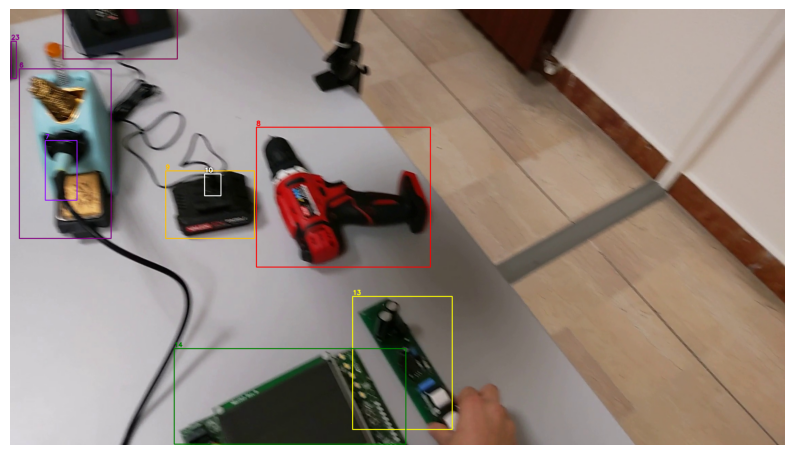

In [29]:
import cv2
import matplotlib.pyplot as plt

# Percorso dell'immagine
img_path = "44_1437.jpg"

# Lista di oggetti
# x = div_arr[1]['value']['objects']
x = [
        {
          "id": 20,
          "x": 1004.84,
          "y": 842.244,
          "w": 292.671,
          "h": 390.229,
          "class_id": 13
        },
        {
          "id": 21,
          "x": 722,
          "y": 346,
          "w": 510,
          "h": 410,
          "class_id": 8
        },
        {
          "id": 22,
          "x": 27,
          "y": 175,
          "w": 269,
          "h": 497,
          "class_id": 6
        },
        {
          "id": 23,
          "x": 103,
          "y": 385,
          "w": 93,
          "h": 175,
          "class_id": 7
        },
        {
          "id": 24,
          "x": 481,
          "y": 995,
          "w": 679,
          "h": 280,
          "class_id": 14
        },
        {
          "id": 25,
          "x": 456,
          "y": 474,
          "w": 260,
          "h": 198,
          "class_id": 9
        },
        {
          "id": 26,
          "x": 570,
          "y": 483,
          "w": 48,
          "h": 64,
          "class_id": 10
        },
        {
          "id": 27,
          "x": 155,
          "y": -2,
          "w": 335,
          "h": 148,
          "class_id": 24
        },
        {
          "id": 28,
          "x": 3,
          "y": 94,
          "w": 15,
          "h": 109,
          "class_id": 23
        }
      ]

# Apri immagine
img = cv2.imread(img_path)


# Colori diversi per class_id (opzionale)
colors = {
    0: (128, 128, 128),    # power_supply: grigio
    1: (139, 69, 19),      # power_supply_cables: marrone
    2: (0, 128, 128),      # oscilloscope: teal
    3: (255, 0, 0),        # oscilloscope_probe_tip: rosso
    4: (0, 255, 0),        # oscilloscope_ground_clip: verde
    5: (255, 165, 0),      # welder_station: arancione
    6: (128, 0, 128),      # welder_base: viola
    7: (255, 20, 147),     # welder_probe_tip: rosa
    8: (0, 0, 255),        # electric_screwdriver: blu
    9: (0, 191, 255),      # electric_screwdriver_battery: celeste
    10: (255, 255, 255),   # battery_connector: bianco
    11: (255, 255, 0),     # screwdriver: giallo
    12: (255, 0, 255),     # pliers: magenta
    13: (0, 255, 255),     # high_voltage_board: ciano
    14: (0, 128, 0),       # low_voltage_board: verde scuro
    15: (192, 192, 192),   # low_voltage_board_screen: argento
    16: (128, 0, 0),       # register: marrone scuro
    17: (255, 69, 0),      # left_red_button: rosso arancio
    18: (0, 255, 127),     # left_green_button: verde primavera
    19: (178, 34, 34),     # right_red_button: rosso mattone
    20: (50, 205, 50),     # right_green_button: verde lime
    21: (210, 105, 30),    # socket_1: cioccolato
    22: (205, 133, 63),    # socket_2: sabbia
    23: (139, 0, 139),     # socket_3: viola scuro
    24: (75, 0, 130)       # socket_4: indaco
}

# Disegna i bounding box
for obj in x:
    x1, y1 = int(obj['x']), int(obj['y'])
    x2, y2 = x1 + int(obj['w']), y1 + int(obj['h'])
    class_id = obj['class_id']
    color = colors.get(class_id, (255, 255, 255))  # bianco se classe non mappata
    
    # Disegna rettangolo
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    
    # Etichetta classe sopra il box
    cv2.putText(img, str(class_id), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Converti BGR in RGB per Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostra immagine con matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


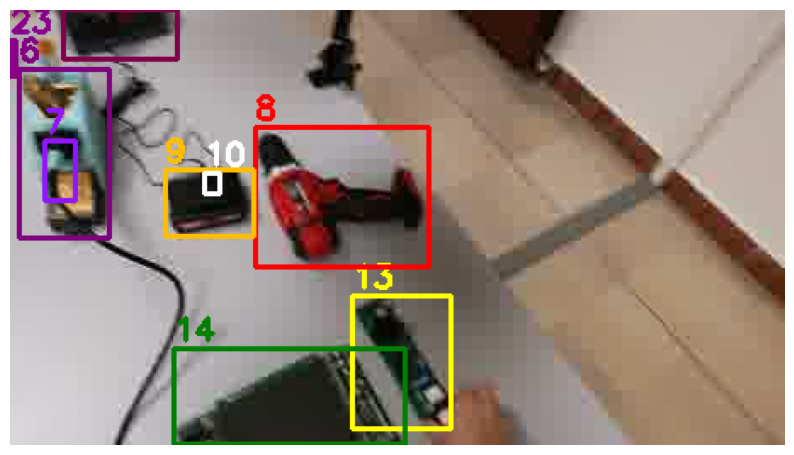

In [30]:
img_path = "frame_0000001437.jpg"

x = [{'id': 20,
  'x': 201.67563380281692,
  'y': 168.71241314553993,
  'w': 58.74030633802817,
  'h': 78.16793740219092,
  'class_id': 13},
 {'id': 21,
  'x': 144.90845070422537,
  'y': 69.30829420970267,
  'w': 102.35915492957747,
  'h': 82.1283255086072,
  'class_id': 8},
 {'id': 22,
  'x': 5.419014084507043,
  'y': 35.0547730829421,
  'w': 53.98943661971831,
  'h': 99.55555555555556,
  'class_id': 6},
 {'id': 23,
  'x': 20.672535211267608,
  'y': 77.12050078247262,
  'w': 18.66549295774648,
  'h': 35.0547730829421,
  'class_id': 7},
 {'id': 24,
  'x': 96.5387323943662,
  'y': 199.3114241001565,
  'w': 136.2781690140845,
  'h': 56.087636932707355,
  'class_id': 14},
 {'id': 25,
  'x': 91.52112676056339,
  'y': 94.94835680751174,
  'w': 52.183098591549296,
  'h': 39.66197183098592,
  'class_id': 9},
 {'id': 26,
  'x': 114.40140845070422,
  'y': 96.75117370892019,
  'w': 9.633802816901408,
  'h': 12.820031298904539,
  'class_id': 10},
 {'id': 27,
  'x': 31.109154929577468,
  'y': -0.40062597809076683,
  'w': 67.23591549295774,
  'h': 29.646322378716746,
  'class_id': 24},
 {'id': 28,
  'x': 0.602112676056338,
  'y': 18.829420970266042,
  'w': 3.0105633802816905,
  'h': 21.83411580594679,
  'class_id': 23}]

# Apri immagine
img = cv2.imread(img_path)

# Disegna i bounding box
for obj in x:
    x1, y1 = int(obj['x']), int(obj['y'])
    x2, y2 = x1 + int(obj['w']), y1 + int(obj['h'])
    class_id = obj['class_id']
    color = colors.get(class_id, (255, 255, 255))  # bianco se classe non mappata
    
    # Disegna rettangolo
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    
    # Etichetta classe sopra il box
    cv2.putText(img, str(class_id), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

# Converti BGR in RGB per Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostra immagine con matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

# enigma benchmark

## q5

In [67]:
import json
import numpy as np

In [68]:
with open("ENIGMA-51_annotations_master.json", "r", encoding="utf-8") as f:
    enigma_annotations = json.load(f)

scaling in `[0,1]`

In [69]:
orig_w, orig_h = 2272, 1278

for k, v in enigma_annotations['frame_annotations'].items():
    for i, obj in enumerate(v['objects']):
        v['objects'][i] = {
            'id': obj['id'],
            'x': obj['x'] / orig_w,       # normalizza rispetto alla larghezza
            'y': obj['y'] / orig_h,       # normalizza rispetto all'altezza
            'w': obj['w'] / orig_w,       # normalizza larghezza
            'h': obj['h'] / orig_h,       # normalizza altezza
            'class_id': obj['class_id']
        }

prendo le annotazioni in ho almeno 2 hoi di oggetti diversi (`class_id` diverse)

In [70]:
enigma_at_least_2_hoi = {}

for k, v in enigma_annotations['frame_annotations'].items():
    interactions = v.get("interactions", [])
    if len(interactions) < 2:
        continue
    
    # Mappa id_obj -> class_id
    obj_classes = {obj['id']: obj['class_id'] for obj in v.get("objects", [])}
    
    # Prendi le classi degli oggetti coinvolti nelle interazioni
    classes_in_interactions = {obj_classes.get(inter['id_obj']) for inter in interactions if inter.get('id_obj') in obj_classes}
    
    # Se ci sono almeno 2 classi diverse
    if len(classes_in_interactions) >= 2:
        # tieni solo una interazione per ciascun id_obj
        seen = set()
        filtered_interactions = []
        for inter in interactions:
            obj_id = inter.get("id_obj")
            if obj_id not in seen:
                filtered_interactions.append(inter)
                seen.add(obj_id)
        
        enigma_at_least_2_hoi[k] = {
            "video_id": v['video_id'],
            "frame_id": v["filename"].split("_")[1].split(".jpg")[0],
            "interactions": filtered_interactions,
            "objects": v.get("objects", []),
        }

In [71]:
enigma_at_least_2_hoi['102_44534']['interactions']

[{'id': 20947, 'id_hand': -1, 'id_obj': 82940, 'interaction_category': 3},
 {'id': 20948, 'id_hand': 18348, 'id_obj': 82941, 'interaction_category': 4}]

nel benchmark vengono richieste 3 versioni per ogni immagine

creo un dizionario:
```python
'<class_id>': {
    'name': <class_name>
    'values': [
        {
            'value': [<frame_id>,[<x0>,<y0>,<x1>,<y1>]],
            'frame_id': <frame_id>,
            'video_id': <video_id>,
            'object_id': <object_id>
        },
        ...
    ]   
}
```

In [80]:
def bbox_iou(boxA, boxB):
    """
    Calcola l'Intersection over Union (IoU) tra due bbox
    box formato [x0, y0, x1, y1]
    """
    # coordinate dell'intersezione
    x_left = max(boxA[0], boxB[0])
    y_top = max(boxA[1], boxB[1])
    x_right = min(boxA[2], boxB[2])
    y_bottom = min(boxA[3], boxB[3])

    if x_right <= x_left or y_bottom <= y_top:
        return 0.0  # nessuna sovrapposizione

    # area intersezione
    inter_area = (x_right - x_left) * (y_bottom - y_top)

    # area totale dei due box
    boxA_area = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxB_area = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # IoU
    iou = inter_area / float(boxA_area + boxB_area - inter_area)
    return iou

OVERLAP_TRESHOLD = 0.3  # massimo overlap accettato (30%)

def exceed_overlap(new_box, objs):
    max_iou = 0.0
    for other in objs:
        if other["id"] == obj["id"]:
            continue  # non confrontare con se stesso
        
        ox0, oy0 = other["x"], other["y"]
        ox1, oy1 = ox0 + other["w"], oy0 + other["h"]
        other_box = [ox0, oy0, ox1, oy1]

        iou = bbox_iou(new_box, other_box)
        if iou > max_iou:
            max_iou = iou

    # tieni solo se NON ha molto overlap con altri
    return max_iou > OVERLAP_TRESHOLD

creo dizionario oggetti per avere le altre versioni dell'oggetto.

filtro tenendo gli oggetti che non hanno molto overlap con gli altri (si vedono bene)

In [81]:
enigma_objects = {}

for class_id, class_info in enigma_annotations["object_classes"].items():
    class_id = int(class_id)
    class_name = class_info["class_name"]

    enigma_objects[class_id] = {
        "name": class_name,
        "values": []
    }

    for k, v in enigma_annotations["frame_annotations"].items():
        objs = v.get("objects", [])
        frame = v["filename"].split("_")[1].split(".jpg")[0]

        for obj in objs:
            if obj["class_id"] == class_id:
                x0 = obj["x"]
                y0 = obj["y"]
                x1 = x0 + obj["w"]
                y1 = y0 + obj["h"]
                new_box = [x0, y0, x1, y1]

                # calcolo l’IoU con tutti gli altri
                if not exceed_overlap(new_box, objs):
                    enigma_objects[class_id]["values"].append({
                        "value": [int(frame), new_box],
                        "frame_id": frame,
                        "video_id": v['video_id'],
                        "object_id": obj["id"],
                    })

In [73]:
enigma_objects[0].keys()

dict_keys(['name', 'values'])

In [91]:
import random
random.seed(10)

enigma_q5 = {
    "id": {},
    "video_id": {},
    "question": {},
    "question_image": {},
    "answers": {},
    "correct": {}
}

MINIMAL_TEMPORAL_GAP = 15  # 0,5 secondi

def get_obj_versions(enigma_objects, v):
    # la prima versione dell'oggetto è quella dell'annotazione corrente
    same_frame_obj = [val for val in enigma_objects["values"]
                if val["video_id"] == v.get("video_id") and val["frame_id"] == v.get("frame_id")]
    
    # le altre due versioni devono avere un gap temporale minimo
    other_objs = [val for val in enigma_objects["values"]
                if val["frame_id"] != v.get("frame_id") and abs(int(val['frame_id']) - int(v.get("frame_id"))) > MINIMAL_TEMPORAL_GAP ]
    
    return same_frame_obj + random.sample(other_objs, min(2, len(other_objs)))

for idx, (k, v) in enumerate(enigma_at_least_2_hoi.items()):
    enigma_q5["id"][str(idx)] = f"Q5_{int(idx):06d}"
    enigma_q5["video_id"][str(idx)] = str(v["video_id"])
    enigma_q5["question"][str(idx)] = "What did I use with [VQ]?"

    # --- QUESTION IMAGE ---
    question_obj_id = v["interactions"][0]["id_obj"]
    question_obj_category = next(obj["class_id"] for obj in v["objects"] if obj["id"] == question_obj_id)
    question_obj_name = enigma_objects[question_obj_category]["name"]

    question_obj = get_obj_versions(enigma_objects[question_obj_category], v)

    enigma_q5["question_image"][str(idx)] = {
        question_obj_name: [val["value"] for val in question_obj]
    }

    # --- CORRECT ANSWER ---
    correct_answer_obj_id = v["interactions"][1]["id_obj"]
    correct_answer_obj_category = next(obj["class_id"] for obj in v["objects"] if obj["id"] == correct_answer_obj_id)
    correct_answer_obj_name = enigma_objects[correct_answer_obj_category]["name"]
    correct_answer_obj = get_obj_versions(enigma_objects[correct_answer_obj_category], v)

    correct_answer_idx = random.randint(1, 5)

    # --- WRONG ANSWERS ---
    wrong_objs = [obj for obj in v['objects'] if obj['id'] != correct_answer_obj_id][:4]
    wrong_answer_candidates = []

    for obj in wrong_objs:
        wrong_obj_category = obj['class_id']
        wrong_obj = get_obj_versions(enigma_objects[wrong_obj_category], v)
        wrong_answer_candidates.append({"cid": wrong_obj_category, "values": wrong_obj})

    # se ci sono meno di 4 oggetti li completo
    # controllo che non sia della stessa classe
    all_categories = [val for val in list(enigma_objects.keys()) if val != correct_answer_obj_category]
    while len(wrong_answer_candidates) < 4:
        random_category = random.choice(all_categories)
        vals = [val for val in enigma_objects[random_category]["values"]]

        candidate = random.sample(vals, min(3, len(vals)))
        # Evita duplicati
        if all(candidate != c["values"] for c in wrong_answer_candidates):
            wrong_answer_candidates.append({"cid": random_category, "values": candidate})

    # --- POPOLA LE RISPOSTE ---
    enigma_q5["answers"][str(idx)] = {}
    wrong_idx = 0
    for i in range(1, 6):
        if i == correct_answer_idx:
            enigma_q5["answers"][str(idx)][str(i)] = {correct_answer_obj_name: [val["value"] for val in correct_answer_obj]}
        else:
            wrong_choice = wrong_answer_candidates[wrong_idx]
            wrong_name = enigma_objects[wrong_choice["cid"]]["name"]
            enigma_q5["answers"][str(idx)][str(i)] = {wrong_name: [val["value"] for val in wrong_choice["values"]]}
            wrong_idx += 1

    # --- CORRECT ANSWER INDEX ---
    enigma_q5["correct"][str(idx)] = correct_answer_idx

In [92]:
import json

with open("Q5_ENIGMA.json", "w", encoding="utf-8") as f:
    json.dump(enigma_q5, f, ensure_ascii=False, indent=2)

## q6

In [20]:
with open("LSAMEGO_44.json", "r", encoding="utf-8") as f:
    lsamego = json.load(f)

In [21]:
lsamego[0].keys()

dict_keys(['cluster', 'features', 'num_frame'])

In [24]:
x = [f['num_frame'][0] for f in lsamego]

In [25]:
x

[206,
 878,
 1419,
 1735,
 1743,
 1785,
 1792,
 1804,
 1823,
 1875,
 1957,
 2227,
 2631,
 2719,
 3101,
 3188,
 3396,
 3404,
 3614,
 3623,
 3813,
 3927,
 4050,
 4070,
 4080,
 4090,
 4429,
 4445,
 4523,
 4544,
 4788,
 4810,
 5044,
 5216,
 5225,
 5466,
 5604,
 5736,
 6001,
 6014,
 6105,
 6543,
 6685,
 7182,
 7205,
 7242,
 7270,
 7295,
 7456,
 7492,
 7548,
 7587,
 7654,
 7691,
 7740,
 7815,
 7966,
 7993,
 8012,
 8021,
 8027,
 8055,
 8119,
 8159,
 8316,
 8342,
 8477,
 8576,
 9402,
 10288,
 10308,
 10636,
 10656,
 10671,
 10897,
 11003,
 11017,
 11110,
 11253,
 11279,
 11425,
 11647,
 11884,
 11922,
 11931,
 12046,
 12089,
 12344,
 12409,
 12518,
 12896,
 13129,
 13180,
 13294,
 13377,
 13457,
 13626,
 13841,
 13965,
 14573,
 14910,
 15059,
 15161,
 15194,
 15576,
 15584,
 15950,
 15967,
 16022,
 16066,
 16108,
 16161,
 16353,
 16962,
 16968,
 17006,
 17274,
 17850,
 17873,
 17892,
 17930,
 18294,
 18465,
 18569,
 19124,
 19135,
 19193,
 19370,
 19432,
 19751,
 19758,
 19777,
 19850,
 20058,

In [28]:
q6_annotations = enigma_annotations['frame_annotations']

In [29]:
import random
random.seed(10)

enigma_q6 = {
    "id": {},
    "video_id": {},
    "question": {},
    "question_image": {},
    "answers": {},
    "correct": {}
}

for idx, (k, v) in enumerate(q6_annotations.items()):
    enigma_q6["id"][str(idx)] = f"Q6_{int(idx):06d}"
    enigma_q6["video_id"][str(idx)] = str(v["video_id"])
    enigma_q6["question"][str(idx)] = "Where did I use [VQ]?"

    # --- QUESTION IMAGE ---
    # obj_id = v["interactions"][0]["id_obj"]
    # id_obj_category = next(obj["class_id"] for obj in v["objects"] if obj["id"] == obj_id)
    # question_image_name = enigma_objects[id_obj_category]["name"]

    # frame_obj = [val for val in enigma_objects[id_obj_category]["values"]
    #              if val["frame_id"] == v.get("frame_id") and val['video_id'] == v['video_id']]
    # other_objs = [val for val in enigma_objects[id_obj_category]["values"]
    #               if val["frame_id"] != v.get("frame_id") and val['video_id'] == v['video_id']]
    # question_obj = frame_obj + random.sample(other_objs, min(2, len(other_objs)))

    # enigma_q6["question_image"][str(idx)] = {
    #     question_image_name: [val["value"] for val in question_obj]
    # }

    # --- CORRECT ANSWER ---
    # obj_answer_id = v["interactions"][1]["id_obj"]
    # id_answer_obj_category = next(obj["class_id"] for obj in v["objects"] if obj["id"] == obj_answer_id)
    # answer_image_name = enigma_objects[id_answer_obj_category]["name"]

    # frame_answer = [val for val in enigma_objects[id_answer_obj_category]["values"]
    #                 if val["frame_id"] == v.get("frame_id") and val['video_id'] == v['video_id']]
    # other_answer_objs = [val for val in enigma_objects[id_answer_obj_category]["values"]
    #                      if val["frame_id"] != v.get("frame_id") and val['video_id'] == v['video_id']]
    # correct_answer_obj = frame_answer + random.sample(other_answer_objs, min(2, len(other_answer_objs)))

    # correct_answer_idx = random.randint(1, 5)
    # enigma_q6["correct"][str(idx)] = correct_answer_idx

    # --- WRONG ANSWERS ---
    # wrong_objs = [obj for obj in v['objects'] if obj['id'] != obj_answer_id][:4]
    # wrong_answer_candidates = []

    # for wrong_obj in wrong_objs:
    #     cid = wrong_obj['class_id']
    #     frame_wrong = [val for val in enigma_objects[cid]["values"]
    #                    if val["frame_id"] == v.get("frame_id") and val['video_id'] == v['video_id']]
    #     other_wrong = [val for val in enigma_objects[cid]["values"]
    #                    if val["frame_id"] != v.get("frame_id") and val['video_id'] == v['video_id']]
    #     wrong_answer_candidates.append({"cid": cid, "values": frame_wrong + random.sample(other_wrong, min(2, len(other_wrong)))})

    # --- COMPLETA SE MENO DI 4 WRONG ---
    # all_categories = list(enigma_objects.keys())
    # while len(wrong_answer_candidates) < 4:
    #     random_cid = random.choice(all_categories)
    #     vals = [val for val in enigma_objects[random_cid]["values"] if val['video_id'] == v['video_id']]
    #     if not vals:
    #         continue
    #     candidate = random.sample(vals, min(3, len(vals)))
    #     Evita duplicati
    #     if all(candidate != c["values"] for c in wrong_answer_candidates):
    #         wrong_answer_candidates.append({"cid": random_cid, "values": candidate})

    # --- POPOLA LE RISPOSTE ---
    # enigma_q6["answers"][str(idx)] = {}
    # wrong_idx = 0
    # for i in range(1, 6):
    #     if i == correct_answer_idx:
    #         enigma_q6["answers"][str(idx)][str(i)] = {answer_image_name: [val["value"] for val in correct_answer_obj]}
    #     else:
    #         wrong_choice = wrong_answer_candidates[wrong_idx]
    #         wrong_name = enigma_objects[wrong_choice["cid"]]["name"]
    #         enigma_q6["answers"][str(idx)][str(i)] = {wrong_name: [val["value"] for val in wrong_choice["values"]]}
    #         wrong_idx += 1

In [30]:
import json

with open("Q6_ENIGMA.json", "w", encoding="utf-8") as f:
    json.dump(enigma_q6, f, ensure_ascii=False, indent=2)